In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline

In [5]:
#Source Image - Collection of 3 points

x_values=[]
y_values=[]
globalx,globaly = -1,-1

# mouse callback function
def sourceCheck3(event,x,y,flags,param):
    global globalx,globaly
    if event == cv2.EVENT_LBUTTONDBLCLK:
        x_values.append(x)
        y_values.append(y)
        globalx,globaly = x,y
        
        
img1 = cv2.imread("./target_image.jpg", 0)
cv2.namedWindow('imageDisplay')
cv2.setMouseCallback('imageDisplay', sourceCheck3)

while(1):
    cv2.imshow('imageDisplay',img1)
    k = cv2.waitKey(1) & 0xFF
    if k == 27 or len(x_values)>2:
        break
        
cv2.destroyAllWindows()

In [6]:
#Displaying the selected points

print(x_values)
print(y_values)

[72, 129, 101]
[116, 116, 178]


In [7]:
x_target=[]
y_target=[]
globalx,globaly = -1,-1
# mouse callback function
def targetCheck3(event,x,y,flags,param):
    global globalx,globaly
    if event == cv2.EVENT_LBUTTONDBLCLK:
        x_target.append(x)
        y_target.append(y)
        globalx,globaly = x,y
        
img2 = cv2.imread("./inputface1.jpg", 0)
cv2.namedWindow('imageDisplay')
cv2.setMouseCallback('imageDisplay', targetCheck3)

while(1):
    cv2.imshow('imageDisplay',img2)
    k = cv2.waitKey(1) & 0xFF
    if k == 27 or len(x_target)>2:
        break
        
cv2.destroyAllWindows()

In [8]:
#Displaying target 

print(x_target)
print(y_target)

[75, 129, 99]
[116, 116, 172]


In [9]:
#Inverting the matrix with source points

six_matrix = [[x_values[0],y_values[0],1,0,0,0],[0,0,0,x_values[0],y_values[0],1],[x_values[1],y_values[1],1,0,0,0],[0,0,0,x_values[1],y_values[1],1],[x_values[2],y_values[2],1,0,0,0],[0,0,0,x_values[2],y_values[2],1]]
invMatrix = np.linalg.inv(six_matrix)

In [10]:
targetCrossMatrix = [ x_target[0],y_target[0],x_target[1],y_target[1],x_target[2],y_target[2]]
targetCrossMatrix

[75, 116, 129, 116, 99, 172]

In [11]:
def ImageTransformation(ImageInput,TranslateMask):
    TargetImage = np.zeros([len(ImageInput), len(ImageInput[0])])
    TranslateMaskInv = np.linalg.inv(TranslateMask)
    for row in range(0,TargetImage.shape[0]):
        for col in range(TargetImage.shape[1]):
            ImageVal=np.float32([[row],[col],[1]])
            SrcImage=np.matmul(TranslateMaskInv,ImageVal)
            TargetTemp= np.round(SrcImage).astype(int)
            
            Tx= TargetTemp[0,0]
            Ty= TargetTemp[1,0]

            if((Tx > 0 and Tx < ImageInput.shape[0]) and (Ty >0 and Ty<ImageInput.shape[1])):      
                   TargetImage[row,col] = ImageInput[Tx,Ty]
            
    TargetImageInt= TargetImage.astype(int)
    return TargetImageInt

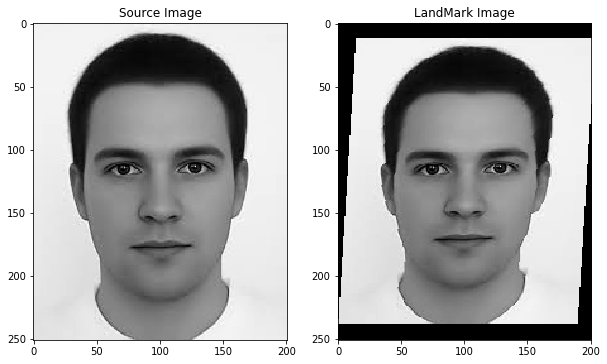

In [12]:
#Calculating the value a in the equation : (X^-1)x = a
landmark= np.matmul(invMatrix,targetCrossMatrix)
MatLandmark = np.reshape(landmark, [2,3])
landmarkMask = np.append(MatLandmark,[[0,0,1]], axis=0)

mask = [[landmarkMask[1][1]],[landmarkMask[1][0]],[landmarkMask[1][2]],[landmarkMask[0][1]],[landmarkMask[0][0]],[landmarkMask[0][2]],[landmarkMask[2][0]],[landmarkMask[2][1]],[landmarkMask[2][2]]]
mask = np.reshape(mask, [3,3])

#Affine Transformation applied to Source Image
LandmarkImageSource = ImageTransformation(img1,mask)
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.title("Source Image")
plt.imshow(img1,cmap = plt.get_cmap('gray'))

f.add_subplot(1,2,2)
plt.title("LandMark Image")
plt.imshow(LandmarkImageSource,cmap = plt.get_cmap('gray'))
plt.show()

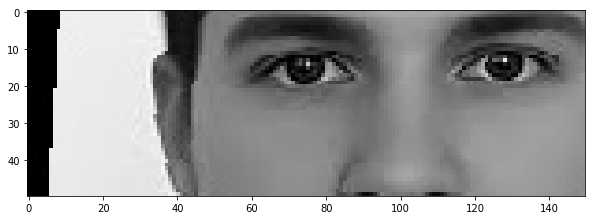

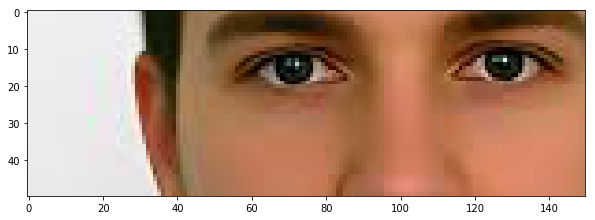

In [14]:
#Zoomed Images to show the differences

cv2.imwrite( "eye.jpg", LandmarkImageSource)
from PIL import Image

image5x5 = Image.open('eye.jpg')
box = (0, 100, 150, 150)
croppedImage = image5x5.crop(box)
#croppedImage.save('cropped_image.jpg')
f = plt.figure(figsize=(10,10)) 
plt.imshow(croppedImage,cmap = plt.get_cmap('gray'))
#croppedImage

original = Image.open('./target_image.jpg')
box = (0, 100, 150, 150)
croppedoriginal = original.crop(box)
f = plt.figure(figsize=(10,10)) 
plt.imshow(croppedoriginal,cmap = plt.get_cmap('gray'))

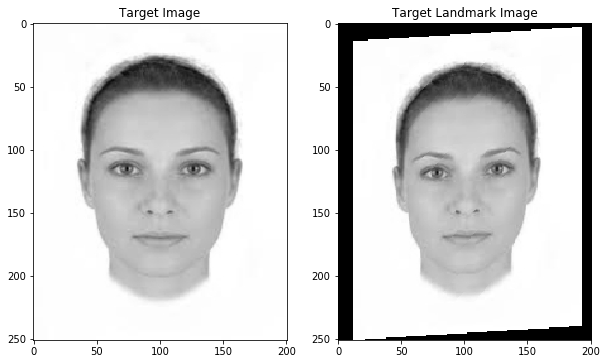

In [15]:
#Affine Transformation applied to Target Image

MatLandmark = np.reshape(landmark, [2,3])
landmarkMask = np.append(MatLandmark,[[0,0,1]], axis=0)

#imgRead = cv2.imread("./pic2.jpg", 0)
LandmarkImageTarget = ImageTransformation(img2,landmarkMask)

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.title("Target Image")
plt.imshow(img2,cmap = plt.get_cmap('gray'))

f.add_subplot(1,2, 2)
plt.title('Target Landmark Image')
plt.imshow(LandmarkImageTarget,cmap = plt.get_cmap('gray'))
plt.show()

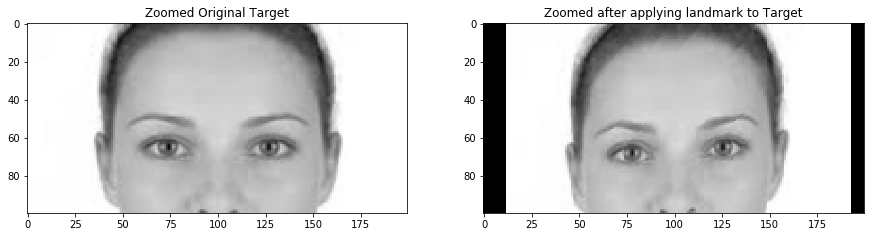

In [16]:
cropped = img2[50:150,0:200]
croppedTarget = LandmarkImageTarget[50:150,0:200]

f = plt.figure(figsize=(15,15))
f.add_subplot(1,2,1)
plt.title("Zoomed Original Target")
plt.imshow(cropped,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2,2)
plt.title("Zoomed after applying landmark to Target")
plt.imshow(croppedTarget,cmap = plt.get_cmap('gray'))
plt.show()

In [17]:
#Generalization Part

In [18]:
#Source Image - Collection of n points

x_values=[]
y_values=[]
globalx,globaly = -1,-1

# mouse callback function
def sourceCheck(event,x,y,flags,param):
    global globalx,globaly
    if event == cv2.EVENT_LBUTTONDBLCLK:
        x_values.append(x)
        y_values.append(y)
        globalx,globaly = x,y
        
        
#img1 = cv2.imread("./target_image.jpg", 0)
cv2.namedWindow('imageDisplay')
cv2.setMouseCallback('imageDisplay', sourceCheck)

while(1):
    cv2.imshow('imageDisplay',img1)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()

In [19]:
#Target Image - Collection of n points

x_target=[]
y_target=[]
globalx,globaly = -1,-1
# mouse callback function
def targetCheck(event,x,y,flags,param):
    global globalx,globaly
    if event == cv2.EVENT_LBUTTONDBLCLK:
        x_target.append(x)
        y_target.append(y)
        globalx,globaly = x,y
        
#img2 = cv2.imread("./inputface1.jpg", 0)
cv2.namedWindow('imageDisplay')
cv2.setMouseCallback('imageDisplay', targetCheck)

while(1):
    cv2.imshow('imageDisplay',img2)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()

In [20]:
#Calculating for a for n points

def generic():
    temp_array = []
    for i in range(len(x_target)):
        temp_array.append(x_target[i])
        temp_array.append(y_target[i])
    temp = np.array(temp_array)
    
    matrix = []
    for i in range(0,len(x_values)):
        matrix.append([x_values[i],y_values[i],1,0,0,0])
        matrix.append([0,0,0,x_values[i],y_values[i],1])
    matrix = np.array(matrix)
    matrix = np.linalg.pinv(matrix)
    A = np.matmul(matrix,temp_array)
    #print(A)
    return A

In [21]:
mark = generic()
print(mark)

[ 8.83488246e-01 -2.33460259e-02  1.40506959e+01  1.21646856e-02
  8.87190123e-01  1.18263864e+01]


[[ 8.83488246e-01 -2.33460259e-02  1.40506959e+01]
 [ 1.21646856e-02  8.87190123e-01  1.18263864e+01]]
[[ 8.83488246e-01 -2.33460259e-02  1.40506959e+01]
 [ 1.21646856e-02  8.87190123e-01  1.18263864e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 8.87190123e-01  1.21646856e-02  1.18263864e+01]
 [-2.33460259e-02  8.83488246e-01  1.40506959e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


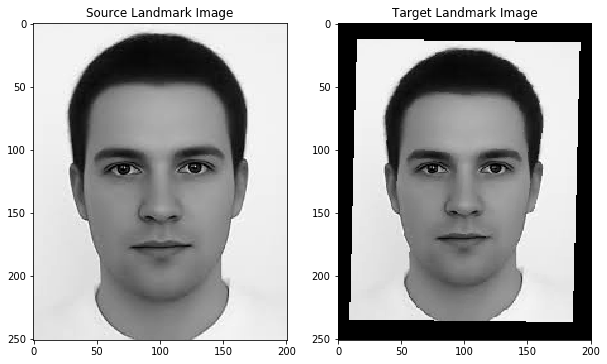

In [22]:
#After Selecting 5 points

MatLandmark = np.reshape(mark, [2,3])
print(MatLandmark)
landmarkMask = np.append(MatLandmark,[[0,0,1]], axis=0)
print(landmarkMask)

mask = [[landmarkMask[1][1]],[landmarkMask[1][0]],[landmarkMask[1][2]],[landmarkMask[0][1]],[landmarkMask[0][0]],[landmarkMask[0][2]],[landmarkMask[2][0]],[landmarkMask[2][1]],[landmarkMask[2][2]]]
mask = np.reshape(mask, [3,3])

print(mask)

#imgRead = cv2.imread("./input.jpg", 0)
LandmarkImage2 = ImageTransformation(img1,mask)


f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.title("Source Landmark Image")
plt.imshow(img1,cmap = plt.get_cmap('gray'))

f.add_subplot(1,2, 2)
plt.title('Target Landmark Image')
plt.imshow(LandmarkImage2,cmap = plt.get_cmap('gray'))
plt.show()

#five


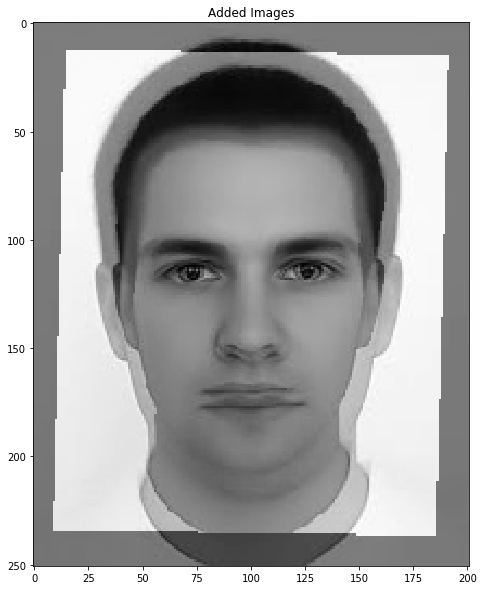

In [24]:
#Adding the original and transformed image

add = np.add(img1,LandmarkImage2)

f = plt.figure(figsize=(10,10))
plt.title("Added Images")
plt.imshow(add,cmap = plt.get_cmap('gray'))
plt.show()